<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제5과목 데이터 모형 평가

제1장 분류 분석 모형 평가

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64
Weight_in_gms,int64


In [ ]:
df['Warehouse_block'] = df['Warehouse_block'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight': 0, 'Road': 1, 'Ship': 2})
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df.drop('Reached.on.Time_Y.N', axis='columns').to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
model = LinearRegression()
model.fit(x, y)
coefImportance = np.abs(model.coef_)
sortedFeature = np.argsort(coefImportance)[::-1]
print(sortedFeature)

[2 6 5 8 7 3 1 0 4 9]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64
Weight_in_gms,int64


In [ ]:
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = LogisticRegression(C=20, max_iter=1000)
model.fit(trainx_scale, trainy)
prediction = model.predict(testx_scale)
result = pd.DataFrame(np.array([testy, prediction]).T, columns=['Actual', 'Predict'])
print(result.head(10))

   Actual  Predict
0       0        1
1       0        1
2       1        1
3       0        1
4       1        1
5       0        1
6       0        1
7       1        1
8       0        1
9       1        1


In [ ]:
print(model.score(trainx_scale, trainy)*100)
print(model.score(testx_scale, testy)*100)
print(model.classes_)
print(model.coef_)
print(model.intercept_)

59.05961813222497
59.93939393939394
[0 1]
[[-0.12554142  0.04525028 -0.082258  ]]
[0.38195347]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64
Weight_in_gms,int64


   Actual  Predict
0       0        1
1       0        1
2       1        1
3       0        1
4       1        1
5       0        1
6       0        1
7       1        1
8       0        1
9       1        1
              precision    recall  f1-score   support

           0       0.39      0.02      0.04      1308
           1       0.60      0.98      0.75      1992

    accuracy                           0.60      3300
   macro avg       0.50      0.50      0.39      3300
weighted avg       0.52      0.60      0.47      3300

0.7471308339709258
0.5993939393939394
0.603522867737948
0.9804216867469879


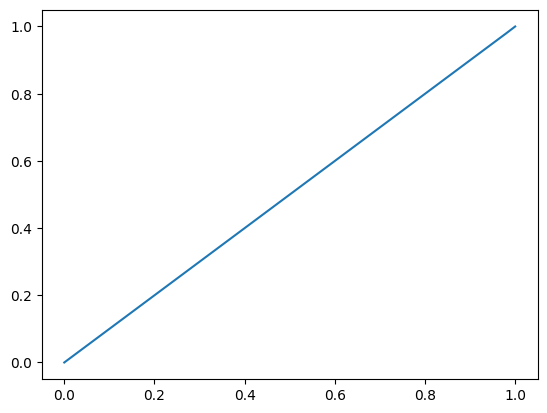

0.49976741829704135


In [ ]:
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = LogisticRegression(C=20, max_iter=1000)
model.fit(trainx_scale, trainy)
prediction = model.predict(testx_scale)
result = pd.DataFrame(np.array([testy, prediction]).T, columns=['Actual', 'Predict'])
print(result.head(10))
print(classification_report(result['Actual'], result['Predict']))
print(f1_score(result['Actual'], result['Predict']))
print(accuracy_score(result['Actual'], result['Predict']))
print(precision_score(result['Actual'], result['Predict']))
print(recall_score(result['Actual'], result['Predict']))
fpr, tpr, thresholds = roc_curve(result['Actual'], result['Predict'])
plt.plot(fpr, tpr)
plt.show()
print(auc(fpr, tpr))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
print(df.dtypes)
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
xtrainscaled = scaler.transform(trainx)
xtestscaled = scaler.transform(testx)
model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
accuracy = accuracy_score(testy, ypred)
print(accuracy)
print(classification_report(testy, ypred))
resultsvm = pd.DataFrame(np.zeros((3300, 2)), columns=['Actual', 'Predict'])
resultsvm['Actual'] = pd.DataFrame(testy)
resultsvm['Predict'] = pd.DataFrame(ypred)
print(resultsvm.head())

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
0.6051515151515151
              precision    recall  f1-score   support

           0       0.59      0.01      0.03      1308
           1       0.61      0.99      0.75      1992

    accuracy                           0.61      3300
   macro avg       0.60      0.50      0.39      3300
weighted avg       0.60      0.61      0.46      3300

   Actual  Predict
0       0        1
1       0        1
2       1        1
3       0        1
4       1        1


0.7524225726771803
0.6051515151515151
0.6053194741669214
0.9939759036144579


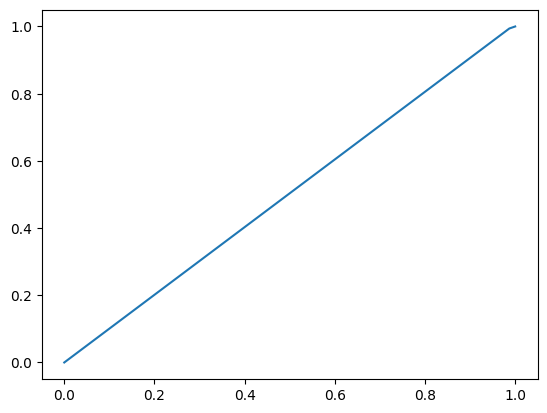

0.5034864227552412


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
xtrainscaled = scaler.transform(trainx)
xtestscaled = scaler.transform(testx)
model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
print(f1_score(testy, ypred))
print(accuracy_score(testy, ypred))
print(precision_score(testy, ypred))
print(recall_score(testy, ypred))
fpr, tpr, thresholds = roc_curve(testy, ypred)
plt.plot(fpr, tpr)
plt.show()
print(auc(fpr, tpr))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
xtrainscaled = scaler.transform(trainx)
xtestscaled = scaler.transform(testx)
model = SVC()
param_grid = {
    'kernel':['rbf'],
    'C':[0.1, 10],
    'gamma':[0.1, 0.01]
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrainscaled, trainy)
print(grid_search.best_params_)
bestmodel = grid_search.best_estimator_
accuracy = bestmodel.score(xtestscaled, testy)
print(accuracy)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.6036363636363636


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1308
           1       0.60      1.00      0.75      1992

    accuracy                           0.60      3300
   macro avg       0.30      0.50      0.38      3300
weighted avg       0.36      0.60      0.45      3300

0.6036363636363636


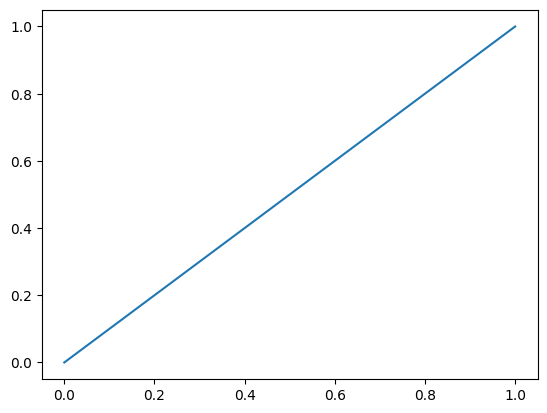

0.5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
xtrainscaled = scaler.transform(trainx)
xtestscaled = scaler.transform(testx)
model = SVC(kernel='rbf', C=0.1, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
print(classification_report(testy, ypred))
print(accuracy_score(testy, ypred))
fpr, tpr, thresholds = roc_curve(testy, ypred)
plt.plot(fpr, tpr)
plt.show()
print(auc(fpr, tpr))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
print(df.dtypes)
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
model = CategoricalNB(alpha=0.8).fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print(model.get_params())
print(model.score(trainx, trainy))

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
[1 1 0 1 1 1 1 1 1 1]
{'alpha': 0.8, 'class_prior': None, 'fit_prior': True, 'force_alpha': True, 'min_categories': None}
0.5996882712040524


Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
[1 1 1 0 1 1 1 1 1 1]
{'alpha': 0.8, 'class_prior': None, 'fit_prior': True, 'force_alpha': True, 'min_categories': None}
0.5893939393939394
[[ 262 1050]
 [ 305 1683]]
              precision    recall  f1-score   support

           0       0.46      0.20      0.28      1312
           1       0.62      0.85      0.71      1988

    accuracy                           0.59      3300
   macro avg       0.54      0.52      0.50      3300
weighted avg       0.55      0.59      0.54      3300

0.7129845371743275
0.5893939393939394
0.6158068057080132
0.846579476861167


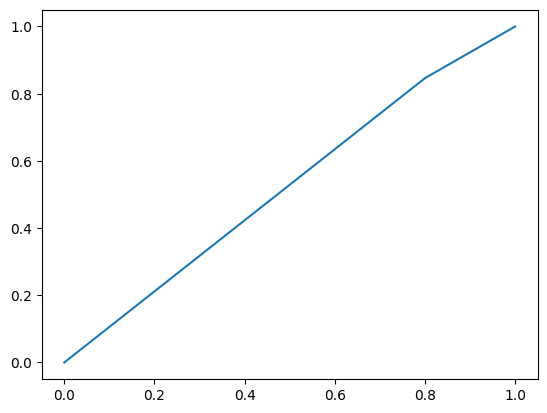

0.5231372994061932


In [ ]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
print(df.dtypes)
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = CategoricalNB(alpha=0.8).fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print(model.get_params())
print(model.score(testx, testy))
conf = confusion_matrix(testy, predictions)
print(conf)
print(classification_report(testy, predictions))
print(f1_score(testy, predictions))
print(accuracy_score(testy, predictions))
print(precision_score(testy, predictions))
print(recall_score(testy, predictions))
fpr, tpr, thresholds = roc_curve(testy, predictions)
plt.plot(fpr, tpr)
plt.show()
print(auc(fpr, tpr))

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print('Random Forest 분류 모형 성능(정확도): ', end='');print(accuracy_score(testy, predictions))
print('$$$Confusion Matrix, 혼동행렬$$$')
conf = confusion_matrix(testy, predictions)
print(conf)
print(classification_report(testy, predictions));print(conf)
print('***분류 분석 모형 성능평가 지표***')
print(classification_report(testy, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

[1 1 0 1 1 1 1 1 1 1]
Random Forest 분류 모형 성능(정확도): 0.6006060606060606
$$$Confusion Matrix, 혼동행렬$$$
[[ 265 1043]
 [ 275 1717]]
              precision    recall  f1-score   support

           0       0.49      0.20      0.29      1308
           1       0.62      0.86      0.72      1992

    accuracy                           0.60      3300
   macro avg       0.56      0.53      0.50      3300
weighted avg       0.57      0.60      0.55      3300

[[ 265 1043]
 [ 275 1717]]
***분류 분석 모형 성능평가 지표***
              precision    recall  f1-score   support

           0       0.49      0.20      0.29      1308
           1       0.62      0.86      0.72      1992

    accuracy                           0.60      3300
   macro avg       0.56      0.53      0.50      3300
weighted avg       0.57      0.60      0.55      3300

!!! 특성 중요도 !!!
[0.32619056 0.13236329 0.54144614]


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print('ExtraTreesClassifier 정확도(Bootstrap 샘플 미사용): ', end='');print(accuracy_score(testy, predictions))
print('$$$Confusion Matrix, 혼동행렬$$$')
conf = confusion_matrix(testy, predictions)
print(conf)
print(classification_report(testy, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

[1 1 0 1 1 1 1 1 1 1]
ExtraTreesClassifier 정확도(Bootstrap 샘플 미사용): 0.5990909090909091
$$$Confusion Matrix, 혼동행렬$$$
[[ 250 1058]
 [ 265 1727]]
              precision    recall  f1-score   support

           0       0.49      0.19      0.27      1308
           1       0.62      0.87      0.72      1992

    accuracy                           0.60      3300
   macro avg       0.55      0.53      0.50      3300
weighted avg       0.57      0.60      0.55      3300

!!! 특성 중요도 !!!
[0.24205835 0.17436094 0.58358071]


[1 1 1 1 1 1 1 1 1 1]
DecisionTree 분류기(결정트리 알고리즘) 정확도: 0.5966906082371125
$$$Confusion Matrix, 혼동행렬$$$
[[   0 4436]
 [   0 6563]]
***분류 분석 모형 성능평가 지표
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4436
           1       0.60      1.00      0.75      6563

    accuracy                           0.60     10999
   macro avg       0.30      0.50      0.37     10999
weighted avg       0.36      0.60      0.45     10999

!!! 특성 중요도 !!!
[0.17628003 0.         0.82371997]


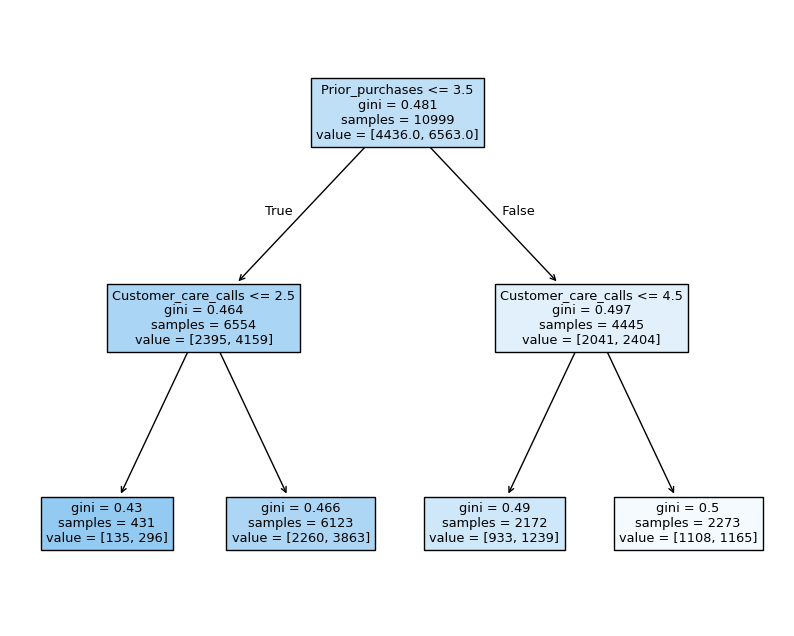

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(max_depth=2, random_state=42)
scores = cross_validate(model, x, y, cv=5, return_train_score=True)
model.fit(x,y)
predictions = model.predict(x)
print(predictions[:10])
print('DecisionTree 분류기(결정트리 알고리즘) 정확도: ', end='');print(accuracy_score(y, predictions))
print('$$$Confusion Matrix, 혼동행렬$$$')
conf = confusion_matrix(y, predictions)
print(conf)
print('***분류 분석 모형 성능평가 지표')
print(classification_report(y, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)
plt.figure(figsize=(10,8))
plot_tree(model, feature_names=['Customer_care_calls','Product_importance','Prior_purchases'], filled=True)
plt.show()